# Implementation of Bayes Optimization

* The Bayes Optimization algorithm is used for complex optimization problems.
* Usually the objective function is complex and intractable to analyze and is often non-convex (local extrema may or may not be the global extrema), nonlinear, high dimension (defined by the number of input variables), noisy, and computationally expensive to evaluate.
* Bayesian Optimization builds a probabilistic model of the objective function (tune the hyperparameters), called the surrogate function.


Important desciptions:
1. *Samples*: One sample is often defined as a vector of variables with a predefined range in an n-dimensional space.
2. *Cost*: has units that are specific to a given domain. Optimization is often described in terms of minimizing cost.
3. *Objective function*: it is often referred to as a black box function and the search process as black box optimization.

Summary of optimization in machine learning:

* *Algorithm Training*: Optimization of model parameters.
* *Algorithm Tuning*: Optimization of model hyperparameters.
* *Predictive Modeling*: Optimization of data, data preparation, and algorithm selection.

**A directed approach to global optimization that uses probability is called Bayesian Optimization.**


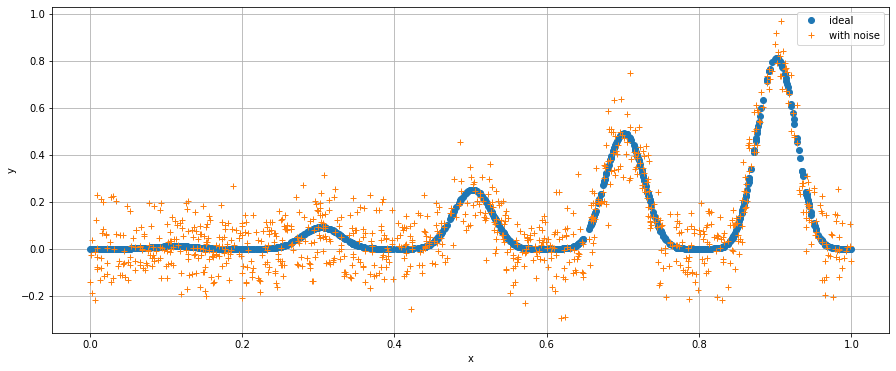

In [31]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

#Sample space
x = np.random.random(1000)
#Function
y0 =  x**2 * np.sin(5 * pi * x)**6
#add gaussian noise with u=0 and sigma=0.1
y = y0 + np.random.normal(loc=0.0, scale=0.1, size=len(y0))

plt.figure(figsize=(15,6))
plt.plot(x,y0,'o', label='ideal')
plt.plot(x,y,'+', label='with noise')
plt.legend(loc='best')
plt.grid('dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Bayes Optimization

Uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function.

* Bayes Theorem: P(A|B) = P(B|A) * P(A) / P(B)

Without P(B) we could describe the conditional probability as a proportional quantity. This is useful as we are not interested in calculating a specific conditional probability, but instead in optimizing a quantity.

        P(A|B) = P(B|A) * P(A)

The conditional probability P(A|B) that we are calculating is referred to generally as the posterior probability; the reverse conditional probability is referred to as the likelihood, and the marginal probability is referred to as the prior probability; for example:

        posterior = likelihood * prior

This provides a framework that can be used to quantify the beliefs about an unknown objective function given samples from the domain and their evaluation via the objective function.

We can devise specific samples (x1, x2, …, xn) and evaluate them using the objective function f(xi) that returns the cost or outcome for the sample xi. Samples and their outcome are collected sequentially and define our data D, e.g. D = {xi, f(xi), … xn, f(xn)} and is used to define the prior. 

The likelihood function is defined as the probability of observing the data given the function P(D | f). This likelihood function will change as more observations are collected.

        P(f|D) = P(D|f) * P(f)

The posterior represents everything we know about the objective function. It is an approximation of the objective function and can be used to estimate the cost of different candidate samples that we may want to evaluate.

In this way, the posterior probability is a surrogate objective function.

* *Surrogate function*: Bayesian approximation of the objective function that can be sampled efficiently. Gives an estimate of the objective function, which can be used to direct future sampling. Sampling involves careful use of the posterior in a function known as the “acquisition” function, e.g. for acquiring more samples.
* *Acquisition Function*: Technique by which the posterior is used to select the next sample from the search space.

**The Bayesian Optimization algorithm can be summarized as follows**

1. Select a Sample by Optimizing the Acquisition Function.
2. Evaluate the Sample With the Objective Function.
3. Update the Data and, in turn, the Surrogate Function.
4. Go To 1.

In [32]:
def objective_fuction(x):
    y0 =  x**2 * np.sin(5 * pi * x)**6
    return y0 + np.random.normal(loc=0.0, scale=0.1, size=len(y0))